# Energy Consumption in China (2000 - 2018)


## Statement
*National Bureau of Statistics of China(NBS)* collects data from various aspects in China, including general survey, population, national accounts, tourism and so on. In recent years, it is said that energy consumption grows rapidly but the dataset in *NBS* can not observe directly. This project aims to analyze some parts the dataset of energy consumption in China and achieve data visualization.

Here is the website of *NBS*: http://www.stats.gov.cn/english/

## Data Description

*National Data* is established by *National Bureau of Statistics of China(NBS)*, which is a platform to share data of many aspects of China. *National Data* records regional data on consumption of major energy products of the country.  The data of this project is collected from *National Data* that it is absolutely true.



![national_data.png](national_data.png)

The data are structured as follows:

Here are files of the data of different kinds of energy consumption in China from 2000 to 2015 except <kbd>total.csv</kbd>.
<kbd>total.csv</kbd> includes the total consumption data from 2000 to 2018.

In [1]:
import os
for file in os.listdir(r'annual_data_nation'):
    print(file)

crude_oil.csv
coke.csv
total.csv
electricity.csv
kerosence.csv
coal.csv
.ipynb_checkpoints
diesel_oil.csv
gasoline.csv
fuel_oil.csv
natural_gas.csv


## Data Preparation

Let's load some library needed throughout the analysis:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from matplotlib import axes
from matplotlib import cm
import seaborn as sns
sns.set(color_codes=True)

## Total Consumption

Let's read the total consumption(including different aspects) of China in recent years.

In [4]:
total = pd.read_csv('annual_data_nation/total.csv')
total.head(5)

,Indicators,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,Total Energy Consumption(10000 tons of SCE),464000.0,449000.0,435818.63,429905.00,425806.00,416913.00,402138.00,387043.00,360648.00,...,320611.00,311442.00,286467.00,261369.00,230281.00,197083.00,169577.00,155547.00,146964.00,NaN
1,Total Energy Consumption Farming Forestry Anim...,NaN,NaN,NaN,8231.66,8094.27,8054.80,6784.43,6758.56,6477.30,...,6013.13,6228.40,6330.71,6071.06,5697.35,4954.60,4331.18,4115.20,3913.77,NaN
2,Total Energy Consumption Industry(10000 tons o...,NaN,NaN,NaN,292275.96,295686.44,291130.63,252462.78,246440.96,232018.82,...,209302.15,200531.38,184945.45,168723.53,152506.51,131167.92,113600.44,107137.60,103773.85,NaN
3,Total Energy Consumption Mining(10000 tons of ...,NaN,NaN,NaN,19258.44,23026.02,23924.43,21176.92,20024.66,18399.39,...,17050.44,15240.74,14247.13,13914.67,13182.63,13187.60,11685.52,11440.02,10968.06,NaN
4,Total Energy Consumption Extraction of Petrole...,NaN,NaN,NaN,4266.09,4263.82,4088.42,3807.89,3934.36,4057.55,...,4210.04,3651.26,3586.79,3710.92,3637.69,4677.96,4680.63,4215.30,3963.58,NaN


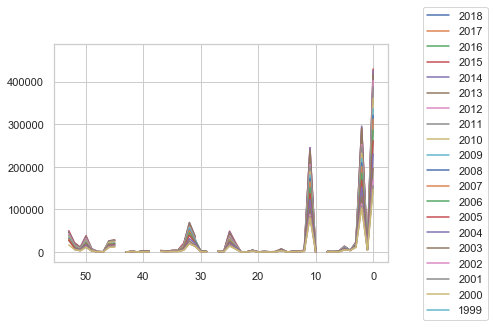

In [272]:
#View it by plot

sns.set(style="whitegrid")

total.plot()
plt.gca().invert_xaxis() 
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1.2))

From the table, we can find that some data was missing and the data of `Total Energy Consumption` is sufficient. I plan to select `Total Energy Consumption` to do some simple analysis and make some plots.

In [262]:
# Total consumption change from 2000 to 2018
total1 = (total[0:1]).T[1:20]
total1.T

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,464000,449000,435819,429905,425806,416913,402138,387043,360648,336126,320611,311442,286467,261369,230281,197083,169577,155547,146964


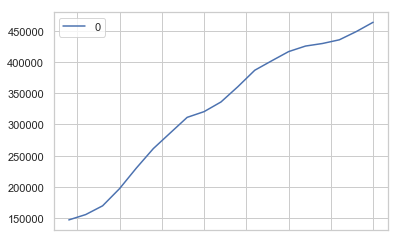

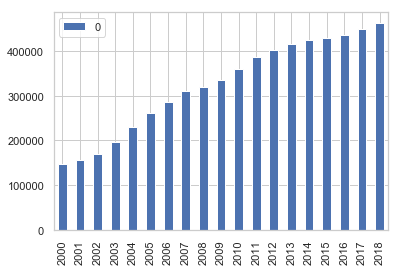

In [263]:
# total energy consumption

total1.plot()
plt.gca().invert_xaxis() 
plt.legend();

total1.plot(kind='bar')
plt.gca().invert_xaxis() 
plt.legend();

From the table above, we can easily find that the consumption rises stably. <br>
<br>
I wonder if we can observe details better. So I select 7 most representative types of energy consumption and view them by `pairplot`.

In [9]:
# Select data

total2 = total[1:8].dropna(axis=1, how='any')
total2

,Indicators,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
1,Total Energy Consumption Farming Forestry Anim...,8231.66,8094.27,8054.80,6784.43,6758.56,6477.30,6251.18,6013.13,6228.40,6330.71,6071.06,5697.35,4954.60,4331.18,4115.20,3913.77
2,Total Energy Consumption Industry(10000 tons o...,292275.96,295686.44,291130.63,252462.78,246440.96,232018.82,219197.16,209302.15,200531.38,184945.45,168723.53,152506.51,131167.92,113600.44,107137.60,103773.85
3,Total Energy Consumption Mining(10000 tons of ...,19258.44,23026.02,23924.43,21176.92,20024.66,18399.39,17585.17,17050.44,15240.74,14247.13,13914.67,13182.63,13187.60,11685.52,11440.02,10968.06
4,Total Energy Consumption Extraction of Petrole...,4266.09,4263.82,4088.42,3807.89,3934.36,4057.55,3945.90,4210.04,3651.26,3586.79,3710.92,3637.69,4677.96,4680.63,4215.30,3963.58
5,Total Energy Consumption Mining and Washing of...,10168.06,13079.88,14179.99,12339.12,11566.47,10574.43,10206.55,9356.17,8269.88,7672.90,7522.45,7180.22,6193.70,5132.80,5440.30,5286.08
6,Total Energy Consumption Mining and Processing...,1658.89,2169.98,2223.59,1842.98,1920.70,1573.35,1250.90,1408.03,1330.32,1138.05,971.13,720.26,593.14,450.92,390.60,374.66
7,Total Energy Consumption Mining and Processing...,1171.81,1280.16,1280.19,1180.82,1146.53,954.16,832.89,863.14,828.89,738.02,680.67,646.12,604.60,467.77,453.50,425.26


They are pretty consistent and it is hard to find which grows fastest and effects the total consumption more.

## Electricity Consumption

As the technology develops quickly, electrity consumption of the whole country grows rapidly. I guess that the electrity consumption has a big influence in the change of total consumption. Here is the data of national electricity consumption and I try to privide that assumption by the following analysis.   
Also, some remote places of China can use electricity very late. The data of electricity consumption also need to do some data cleaning.

### National Electricity Consumption

In [75]:
# Clean the NULL value

e_nation = pd.read_csv('annual_data_nation/electricity.csv').dropna(axis=1, how='all').dropna(axis=0, how='any')
e_nation.head()

,Indicators,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Total Electricity Consumption(100 million kwh),58019.97,56383.69,54203.41,49762.64,47000.88,41934.49,37032.14,34541.35,32711.81,28587.97,24940.32,21971.37,19031.60,16465.45,14723.46,13472.38
1,Total Electricity Consumption Farming Forestry...,1039.83,1013.39,1026.87,1012.57,1012.90,976.49,939.90,887.05,878.96,827.04,776.33,768.87,693.15,606.23,582.39,532.96
2,Total Electricity Consumption Industry(100 mil...,41549.99,40802.71,39236.88,36232.21,34691.55,30871.77,26854.49,25388.63,24290.81,21267.74,18521.69,16424.29,14169.68,12402.16,10944.66,10004.62
3,Total Electricity Consumption Mining(100 milli...,2377.66,2594.81,2573.16,2391.90,2245.23,1940.39,1761.77,1701.27,1589.79,1479.27,1480.34,1387.08,1276.57,1177.66,1096.96,993.71
4,Total Electricity Consumption Mining and Washi...,883.79,939.66,955.77,879.14,818.57,751.67,691.13,639.93,600.28,580.45,589.53,582.75,533.99,520.84,467.35,417.16


Total electricity consumption from 2000-2015:

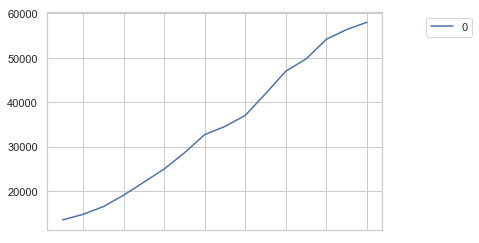

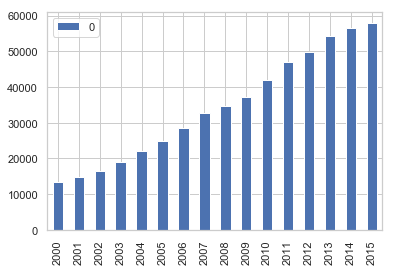

In [264]:
# select data
# draw line & bar chart

e_nation_total = e_nation[:1].T[1:]
e_nation_total.plot()
plt.gca().invert_xaxis() 
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1))

e_nation_total.plot(kind='bar')
plt.gca().invert_xaxis() 
plt.legend();

From these charts, we can easily find that the electrity consumption in the whole country grows quickly. The consumption has probably increased by 6 times in 20 years. It means electricity consumption promotes rapid growth of the total energy consumption in China.

### Electrity consumption of each province.

Determined that electricity consumption is one of the main influencing factors, maybe aggregating data by each province can find more.

In [197]:
#Upload the data of electricity consumption from provinces

e_province = pd.read_csv('AnnualbyProvinceElectricity.csv').dropna(axis=1, how='all').dropna(axis=0, how='any')
e_province.head(10)

,Region,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
0,Guangdong,5958.97,5610.13,5310.69,5235.23,4830.1,4619.4,4399.02,4060.13,3609.64,3504.82,3394.05,3004.03,2673.56,2387.14,2031.29,1687.83,1458.42,1334.58,1086.24
1,Jiangsu,5807.89,5458.95,5114.70,5012.54,4956.6,4580.9,4281.62,3864.37,3313.99,3118.32,2952.02,2569.75,2193.45,1820.08,1505.13,1245.14,1078.44,971.34,848.74
2,Shandong,5430.16,5390.75,5117.05,4223.49,4083.1,3794.6,3635.26,3298.46,2941.07,2726.97,2596.05,2272.07,1911.61,1693.71,1395.72,1241.74,1104.53,1000.71,805.47
3,Zhejiang,4192.63,3873.19,3553.90,3506.39,3453.1,3210.6,3116.91,2820.93,2471.44,2322.87,2189.37,1909.23,1642.31,1419.53,1240.35,1010.72,848.40,738.05,611.67
4,Hebei,3441.74,3264.52,3175.66,3314.11,3251.2,3077.7,2984.90,2691.52,2343.85,2095.02,2013.67,1734.83,1501.92,1291.41,1098.99,965.83,867.55,809.34,745.72
5,Henan,3166.17,2989.15,2879.62,2919.57,2899.2,2747.7,2659.14,2353.96,2081.38,1970.77,1808.00,1523.50,1352.74,1299.63,1054.64,916.25,808.41,718.52,672.09
6,Inner Mongolia,2891.87,2605.03,2542.87,2416.74,2181.9,2016.8,1864.07,1536.83,1287.93,1220.57,1160.21,884.91,667.72,535.58,406.62,320.43,280.89,254.21,236.77
7,Sichuan,2205.18,2101.02,1992.40,2014.79,1949.0,1830.7,1751.44,1549.03,1324.61,1210.13,1177.51,1059.44,942.59,857.02,758.79,660.51,589.57,521.23,462.26
8,Liaoning,2135.50,2037.40,1984.89,2038.73,2008.5,1899.9,1861.53,1715.26,1488.17,1412.00,1359.51,1228.27,1110.56,1058.10,886.88,809.45,764.77,748.89,756.11
9,Fujian,2112.72,1968.58,1851.86,1855.79,1700.7,1579.5,1515.86,1315.09,1134.92,1073.55,1000.33,866.84,756.59,664.35,585.35,496.83,439.19,401.51,355.26


It is obviously to know energy consumption have differences between different region. But what about the interval of the amount of consumption. `Joint plot` can tell us where these data focus in.

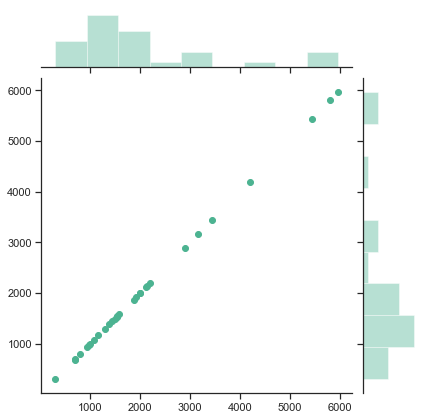

In [249]:
sns.set(style = "ticks")
ep_2017 = e_province[['2017']]
sns.jointplot(ep_2017,ep_2017,color="#4CB391")

The main focus of these figures are 1000-2500 but the highest one almost achieves 6000.

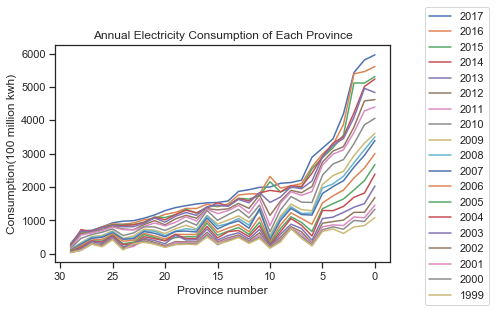

In [250]:
e_province.plot()
plt.gca().invert_xaxis() 
plt.title("Annual Electricity Consumption of Each Province")
plt.ylabel("Consumption(100 million kwh)")
plt.xlabel("Province number")
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1.2))

We can easily find that the consumption of top10 province grows faster that others. <br>
Next part is about the top 10 provinces by electricity consumption.

In [251]:
#Select data

e_province_top10 = e_province[:10][['2017', '2016', '2015', '2014', '2013', '1999']]
e_province_top10

,2017,2016,2015,2014,2013,1999
0,5958.97,5610.13,5310.69,5235.23,4830.1,1086.24
1,5807.89,5458.95,5114.70,5012.54,4956.6,848.74
2,5430.16,5390.75,5117.05,4223.49,4083.1,805.47
3,4192.63,3873.19,3553.90,3506.39,3453.1,611.67
4,3441.74,3264.52,3175.66,3314.11,3251.2,745.72
5,3166.17,2989.15,2879.62,2919.57,2899.2,672.09
6,2891.87,2605.03,2542.87,2416.74,2181.9,236.77
7,2205.18,2101.02,1992.40,2014.79,1949.0,462.26
8,2135.50,2037.40,1984.89,2038.73,2008.5,756.11
9,2112.72,1968.58,1851.86,1855.79,1700.7,355.26


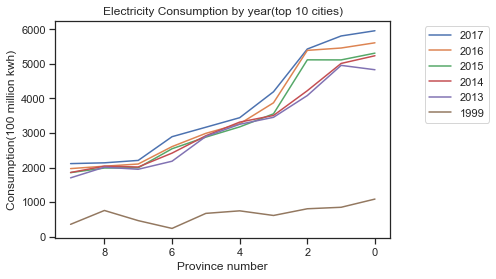

In [252]:
# view the data by chart

e_province_top10.plot()
plt.gca().invert_xaxis() 
plt.title("Electricity Consumption by year(top 10 cities)")
plt.ylabel("Consumption(100 million kwh)")
plt.xlabel("Province number")
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1))

This chart shows us that these provinces still have a big difference between themselves though each of them is a part of the top10. Actually, it is not very clear. We can draw a heat map soon.

In [253]:
e10 = e_province[:10].T[1:6].T.values

In [254]:
e10 =np.array([[5958.97, 5610.13, 5310.69, 5235.23, 4830.1],
       [5807.89, 5458.95, 5114.7, 5012.54, 4956.6],
       [5430.16, 5390.75, 5117.05, 4223.49, 4083.1],
       [4192.63, 3873.19, 3553.9, 3506.39, 3453.1],
       [3441.74, 3264.52, 3175.66, 3314.11, 3251.2],
       [3166.17, 2989.15, 2879.62, 2919.57, 2899.2],
       [2891.87, 2605.03, 2542.87, 2416.74, 2181.9],
       [2205.18, 2101.02, 1992.4, 2014.79, 1949.0],
       [2135.5, 2037.4, 1984.89, 2038.73, 2008.5],
       [2112.72, 1968.58, 1851.86, 1855.79, 1700.7]])

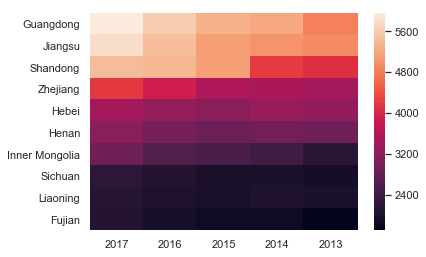

In [273]:
sns.heatmap(e10, xticklabels=('2017', '2016', '2015', '2014', '2013'),
            yticklabels=('Guangdong', 'Jiangsu', 'Shandong', 'Zhejiang', 'Hebei', 'Henan', 'Inner Mongolia', 'Sichuan', 'Liaoning', 'Fujian'))

Through the color of first column in heat map, a big diversity is showed between Guangdong and Fujian. We can assume that this diversity  is create by economic strength.

### Electricity Consumption of Municipality

After visited the electricity consumption of different provinces, big cities also can tell us some information. In this time, I choose the capital and 3 municipalities in China, which are Beijing, Tianjin, Shanghai and Chongqing.

In [256]:
# Find municipalities' total electricity consumption in "e_province"

b = e_province[(e_province.Region=='Beijing')].index.tolist()
s = e_province[(e_province.Region=='Shanghai')].index.tolist()
t = e_province[(e_province.Region=='Tianjin')].index.tolist()
c = e_province[(e_province.Region=='Chongqing')].index.tolist()

b,s,t,c

([22], [16], [26], [23])

From the sort number of `e_province`:   
*No.16* is Shanghai   
*No.22* is Beijing   
*No.23* is Chongqing   
*No.26* is Tianjin   
   
   

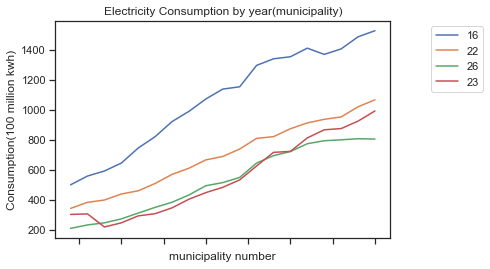

In [257]:
# get the data from sort
municipality_total = e_province.loc[[16,22,26,23]].T[1:]

# draw a chart 
municipality_total.plot()
plt.gca().invert_xaxis() 
plt.title("Electricity Consumption by year(municipality)")
plt.ylabel("Consumption(100 million kwh)")
plt.xlabel("municipality number")
plt.legend(loc='upper center', bbox_to_anchor=(1.2,1))

The disparity between big citys also is large. Then we can view other energy consumption these cities.

In [270]:
Beijing = pd.read_csv('Beijing.csv')
Shanghai = pd.read_csv('Shanghai.csv')
Tianjin = pd.read_csv('Tianjin.csv')
Chongqing = pd.read_csv('Chongqing.csv')

frames = [Beijing, Shanghai, Chongqing, Tianjin]
municipality = pd.concat(frames).dropna(thresh = 5).dropna(axis=1, how='any')
municipality.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Indicators,city
0,2651.00,2719.78,2675.00,2531.0,2674.02,2939.41,3068.97,3055.67,2984.67,2747.73,2664.70,2634.62,2366.00,2270.00,2019.23,1736.54,1165.18,847.62,Consumption of Coal(10000 tons),Beijing
1,441.30,449.08,429.62,378.0,438.25,455.73,397.40,348.62,358.19,232.87,211.97,220.45,33.28,32.27,0.79,0.64,0.44,0.21,Consumption of Coke(10000 tons),Beijing
2,724.05,754.71,700.50,748.0,726.68,809.35,799.60,796.12,950.91,1116.76,1162.93,1116.29,1105.08,1075.77,870.92,1034.62,991.54,821.00,Consumption of Crude Oil(10000 tons),Beijing
3,92.70,106.60,138.69,152.0,165.22,198.39,235.23,278.16,324.72,340.92,363.61,371.53,389.79,415.90,423.61,440.62,462.75,470.37,Consumption of Gasoline(10000 tons),Beijing
4,110.38,117.60,129.25,145.0,137.94,182.82,189.36,233.86,277.10,318.39,341.93,392.63,419.88,443.33,477.06,507.58,544.38,594.27,Consumption of Kerosene(10000 tons),Beijing


To find the their consumption's diversity, we can view them in following charts.

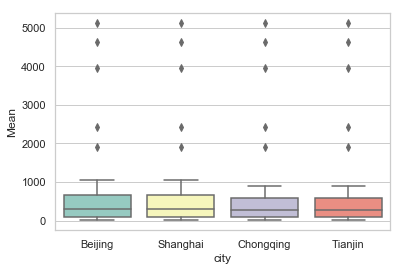

In [271]:
sns.set(style="whitegrid")

mean = pd.DataFrame(municipality.mean(1))
mean.columns = ['Mean']
municipality = municipality.join(mean)
sns.boxplot(x="city", y = municipality["Mean"], data = municipality, palette = "Set3")

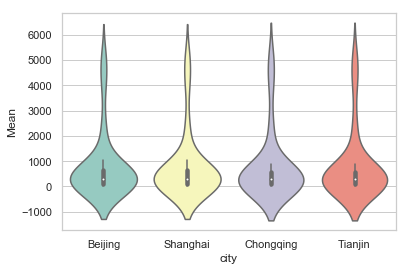

In [265]:
sns.violinplot(x="city", y = municipality["Mean"], data = municipality, palette = "Set3", ax = axes[1])

We found that Shanghai has the largest consumtion in electrity but from the data of total consumption, Beijing uses more energy than others. It is not obvious in `violin plot` but clear in `box plot`. 

## Difficult & Limitation
   
`Diffcult`: The biggest difficult is lack of knowledge. I am not familiar to judge which kinds of plot fits in show the data I analyze. So selecting chart and studying their cods use a lot of time.
`Limitation`: Lack of time. I just use one day to finish this project and just analyze the electrity consumption part in details.

## Reference 

1. Seaborn [1]
2. Pandas 0.24.2 documentation [2]
3. National Data [3]
4. Energy in the Netherlands, an introductory kernel [4]

[1]: https://seaborn.pydata.org
[2]: https://padas.pydata.org
[3]: http://data.stats.gov.cn/english/
[4]: https://www.kaggle.com/lucabasa/energy-in-the-netherlands-an-introductory-kernel/data#Aggregating-data-by-city,-the-better-way